In [ ]:
# This notebook contains Bloom Filter implementation which is to check whether an element in a set
from bitstring import BitArray
l = 2**16
bm = BitArray(int=0, length=l)
bm

ModuleNotFoundError: No module named 'bitstring'

In [2]:
from random import randint

# To generate number of zeros and ones in a bitstring
def gen_bits(a):
    bn = bin(a)
    zeros = bn.count("0")
    ones = bn.count("1")
    return zeros, ones
gen_bits(1023)

(1, 10)

In [3]:
# Create some hash functions
h1 = lambda z : (13*z+3) % l
h2 = lambda o : (15*o+3) % l

In [4]:
# Testing is based on previously introduced element into the hash table via the training procedure
training_num = 10000

training = list(set([randint(0, randint(0, 2**randint(0, l))) for i in range(training_num)]))
training_num = len(training)
print("# of training samples: ", training_num)

# of training samples:  10000


In [5]:
# Traing & Test the Bloom Filter
bm = BitArray(int=0, length=l)
freqs = []
num_collisions = 0
for rnd in training:
    zeros, ones = gen_bits(rnd)
    z = h1(zeros)
    o = h2(ones)
    if bm[z] == 1 and bm[o] == 1:
        num_collisions += 1
    freqs.append(num_collisions)
    bm[z] = 1
    bm[o] = 1
    
print("# of collisions(false positives) : ", num_collisions)
bm

# of collisions(false positives) :  502


BitArray('0x4022a8b38c0244920012019b044100400a443b0004084a404a2641056885701d001e2c93045a018c00118008928100442e048d20f0224701411040053015c00804722021151d103802c09ae00d804b000380520123112486e8166096c021920c20b1924601a0827208a400003d0028800b81740a640020810618a019c0...') # length=65536

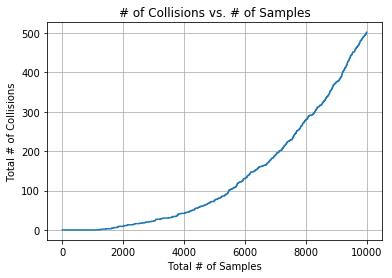

In [6]:
import matplotlib.pyplot as plt
import numpy as np

% matplotlib inline
# Data for plotting
t = np.arange(0, training_num, 1)
s = freqs

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='Total # of Samples', ylabel='Total # of Collisions',
       title='# of Collisions vs. # of Samples')
ax.grid()

plt.show()

In [7]:
fn = 0
for rnd in training:
    zeros, ones = gen_bits(rnd)
    z = h1(zeros)
    o = h2(ones)
    if not (bm[z] == 1 and bm[o] == 1):
        fn += 1
print("False negatives: ", fn) ## ALWAYS ZERO!!

False negatives:  0


In [8]:
"""
Leskovec, J., Rajaraman, A. and Ullman, J. (2016). Mining of massive datasets. Delhi: Cambridge University Press, pp.140-141.
"""

'\nLeskovec, J., Rajaraman, A. and Ullman, J. (2016). Mining of massive datasets. Delhi: Cambridge University Press, pp.140-141.\n'